## Problem Definition

The objective of this study is to ingest data related to the previous two premier league seasons from the *fbref.com* website by scraping data and statistics related to our analysis
using the BeautifulSoup python web scraping library and then conduct a statistical and exploratory analysis to uncover meaningful insights in the data. We then build a machine learning algorithm which is capable of predicting the outcomes of future matches based on the features of the dataset and then tuning our model to perform at it's optimal best.

## Data
The data used for conducting our analysis and project was obtained by scraping data from the **https://fbref.com/en/comps/9/Premier-League-Stats** website. The code written for scraping the data can be found in the **scraping-2.ipynb**

## Evaluation

Success for this project would be based on whether our model can achieve an accuracy score of over 93% and a precision of at least 95%.

## Features:

**Data Dictionary**

* **Date** -- Date listed is local to the match
* **Time** -- Time listed is local to the match venue. Time is written in the 24-hour notation.
* **Round** -- Round or Phase of Competition
* **Day** -- Day of week
* **GF (Goals For)** -- Goals scored by team
* **GA (Goals Against)** -- Goals scored against team
* **xG (Expected Goals)** -- xG totals include penalty kicks, but do not include penalty shootouts (unless otherwise noted). Provided by Opta.
* **xGA (Expected Goals Allowed)** -- xG totals include penalty kicks, but do not include penalty shootouts (unless otherwise noted).Provided by Opta. 
* **Poss (Possession)** Calculated as the percentage of passes attempted
* **attendance** -- total crowd attendance for that fixture.
* **Formation** -- Number of players in each row from defenders to forwards, not including the goalkeeper.
* **comp** -- Competition the match is played in.
* **result** -- result of the fixture played by the team. W - Win, D - Draw, L - Loss
* **opponent** -- team played for that fixture.
* **captain** -- captain chosen for the team for the particular fixture.
* **Sh (Shots Total)** -- Total shots by team in the match. Does not include penalty kicks
* **SoT (Shots on Target)** -- Shots on target do not include penalty kicks
* **Dist (Average Shot Distance)** -- Average distance, in yards, from goal of all shots taken. Does not include penalty kicks
* **FK** -- Shots from Free Kicks
* **PK** -- Penalty Kicks Made
* **PKatt** -- Penalty Kicks Attempted
 


## Exploratory Data Analysis

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('matches.csv', parse_dates={'date_time':['date', 'time']})

In [3]:
df.head()

,date_time,Unnamed: 0,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,2023-08-11 20:00:00,1,Premier League,Matchweek 1,Fri,Away,W,3,0,Burnley,...,Match Report,NaN,17.0,8.0,13.9,0.0,0,0,2024,Manchester City
1,2023-08-19 20:00:00,3,Premier League,Matchweek 2,Sat,Home,W,1,0,Newcastle Utd,...,Match Report,NaN,14.0,4.0,17.9,0.0,0,0,2024,Manchester City
2,2023-08-27 14:00:00,4,Premier League,Matchweek 3,Sun,Away,W,2,1,Sheffield Utd,...,Match Report,NaN,29.0,9.0,17.3,2.0,0,1,2024,Manchester City
3,2023-09-02 15:00:00,5,Premier League,Matchweek 4,Sat,Home,W,5,1,Fulham,...,Match Report,NaN,6.0,4.0,14.8,0.0,1,1,2024,Manchester City
4,2023-09-16 15:00:00,6,Premier League,Matchweek 5,Sat,Away,W,3,1,West Ham,...,Match Report,NaN,29.0,13.0,16.4,1.0,0,0,2024,Manchester City


#### All match fixtures are accounted for each team for the past two seasons
20 teams * 38 matches per season * 2 seasons = 1520

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date_time     1520 non-null   datetime64[ns]
 1   Unnamed: 0    1520 non-null   int64         
 2   comp          1520 non-null   object        
 3   round         1520 non-null   object        
 4   day           1520 non-null   object        
 5   venue         1520 non-null   object        
 6   result        1520 non-null   object        
 7   gf            1520 non-null   int64         
 8   ga            1520 non-null   int64         
 9   opponent      1520 non-null   object        
 10  xg            1520 non-null   float64       
 11  xga           1520 non-null   float64       
 12  poss          1520 non-null   float64       
 13  attendance    1518 non-null   float64       
 14  captain       1520 non-null   object        
 15  formation     1520 non-null   object  

In [5]:
df.date_time.dt.day

0       11
1       19
2       27
3        2
4       16
        ..
1515    30
1516     8
1517    13
1518    21
1519    28
Name: date_time, Length: 1520, dtype: int32

In [6]:
df = df.drop(['Unnamed: 0','notes'], axis=1)

In [7]:
df['formation'] = df['formation'].str.replace("◆","")

In [8]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
date_time,1520,2023-07-09 10:48:11.842105344,2022-08-05 20:00:00,2023-01-21 14:22:30,2023-07-05 06:15:00,2023-12-30 15:00:00,2024-05-19 16:00:00,NaN
gf,1520.0,1.532895,0.0,1.0,1.0,2.0,9.0,1.33084
ga,1520.0,1.532895,0.0,1.0,1.0,2.0,9.0,1.33084
xg,1520.0,1.484605,0.0,0.9,1.4,2.0,7.0,0.849234
xga,1520.0,1.484605,0.0,0.9,1.4,2.0,7.0,0.849234
poss,1520.0,50.000658,18.0,40.0,50.0,60.0,82.0,13.160602
attendance,1518.0,39417.470356,9972.0,25842.5,38164.0,53301.0,75546.0,17194.894146
sh,1520.0,13.086842,1.0,9.0,12.5,16.0,36.0,5.774369
sot,1520.0,4.411184,0.0,3.0,4.0,6.0,15.0,2.51107
dist,1520.0,16.804145,7.0,14.9,16.7,18.5,39.9,2.867066


In [9]:
df.isnull().sum()

date_time       0
comp            0
round           0
day             0
venue           0
result          0
gf              0
ga              0
opponent        0
xg              0
xga             0
poss            0
attendance      2
captain         0
formation       0
referee         0
match report    0
sh              0
sot             0
dist            0
fk              0
pk              0
pkatt           0
season          0
team            0
dtype: int64

In [10]:
df['attendance'] = df['attendance'].fillna(df[['attendance', 'team']].groupby('team')['attendance'].transform('mean'))

In [11]:
df.pivot_table(index='team', columns='result',aggfunc='count')['round'].sort_values(by='W',ascending=False).head()

result,D,L,W
team,,,
Manchester City,12,8,56
Arsenal,11,11,54
Liverpool,20,13,43
Manchester United,12,23,41
Tottenham Hotspur,12,26,38


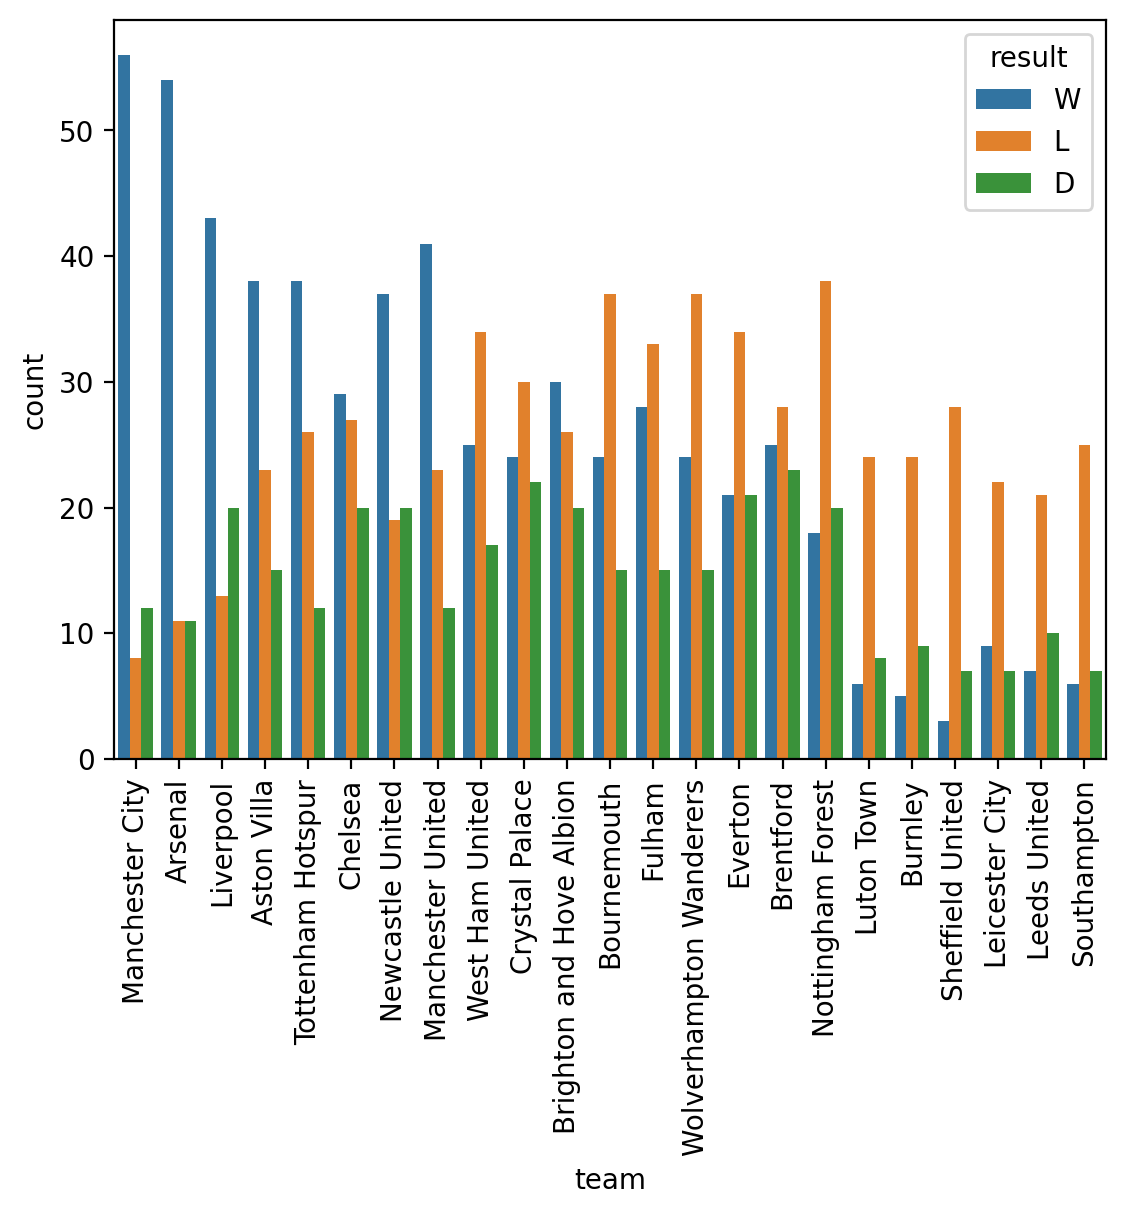

In [12]:
plt.figure(dpi=200)
sns.countplot(data=df, x='team', hue='result')
plt.xticks(rotation=90);

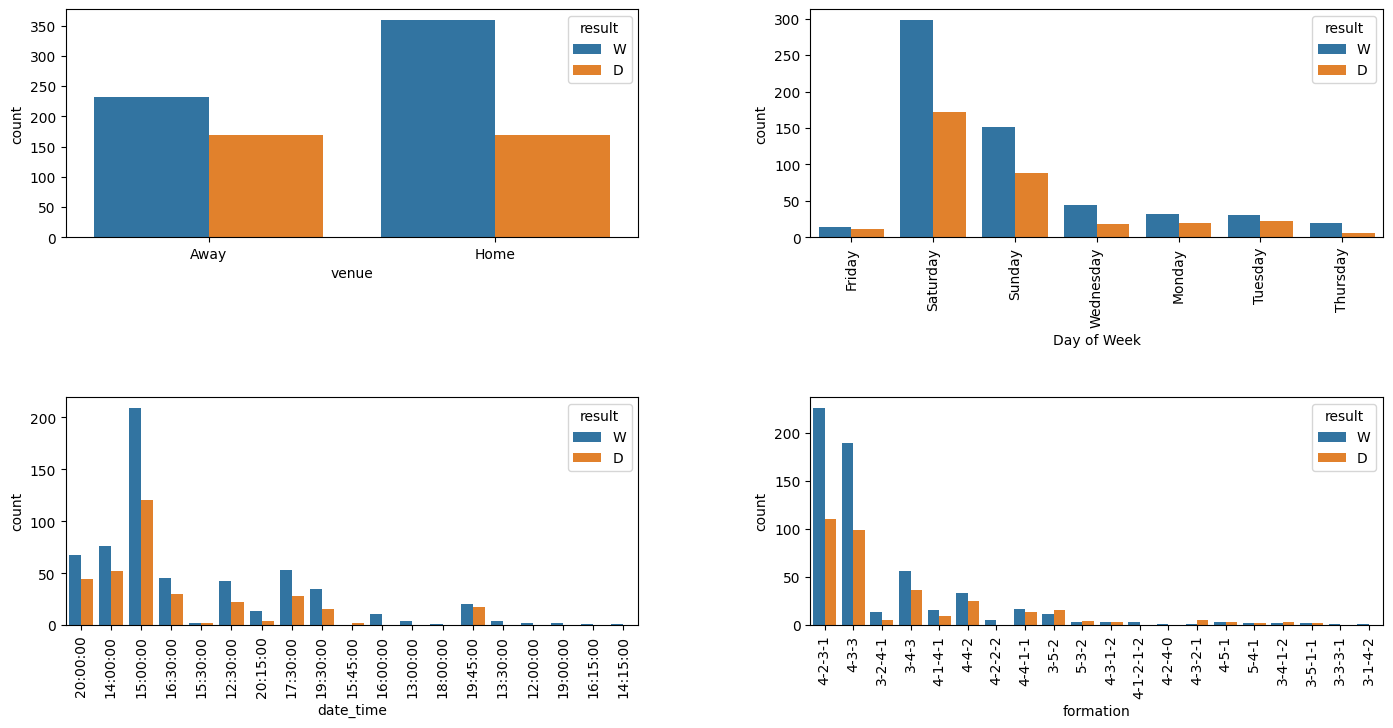

In [13]:
fig, ((ax0, ax1), (ax2, ax3))  = plt.subplots(nrows=2, ncols=2, figsize=(17,8))
fig.subplots_adjust(wspace=0.3, hspace=0.7)
sns.countplot(data=df, x='venue', hue='result', hue_order=['W', 'D'],ax=ax0)
# ax0.set_xticks(rotation=90)
sns.countplot(data=df, x=df.date_time.dt.day_name(), hue='result',hue_order=['W', 'D'], ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_xlabel('Day of Week')
sns.countplot(data=df, x=df.date_time.dt.time, hue='result', hue_order=['W', 'D'],ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
sns.countplot(data=df, x='formation', hue='result',hue_order=['W', 'D'], ax=ax3)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90);

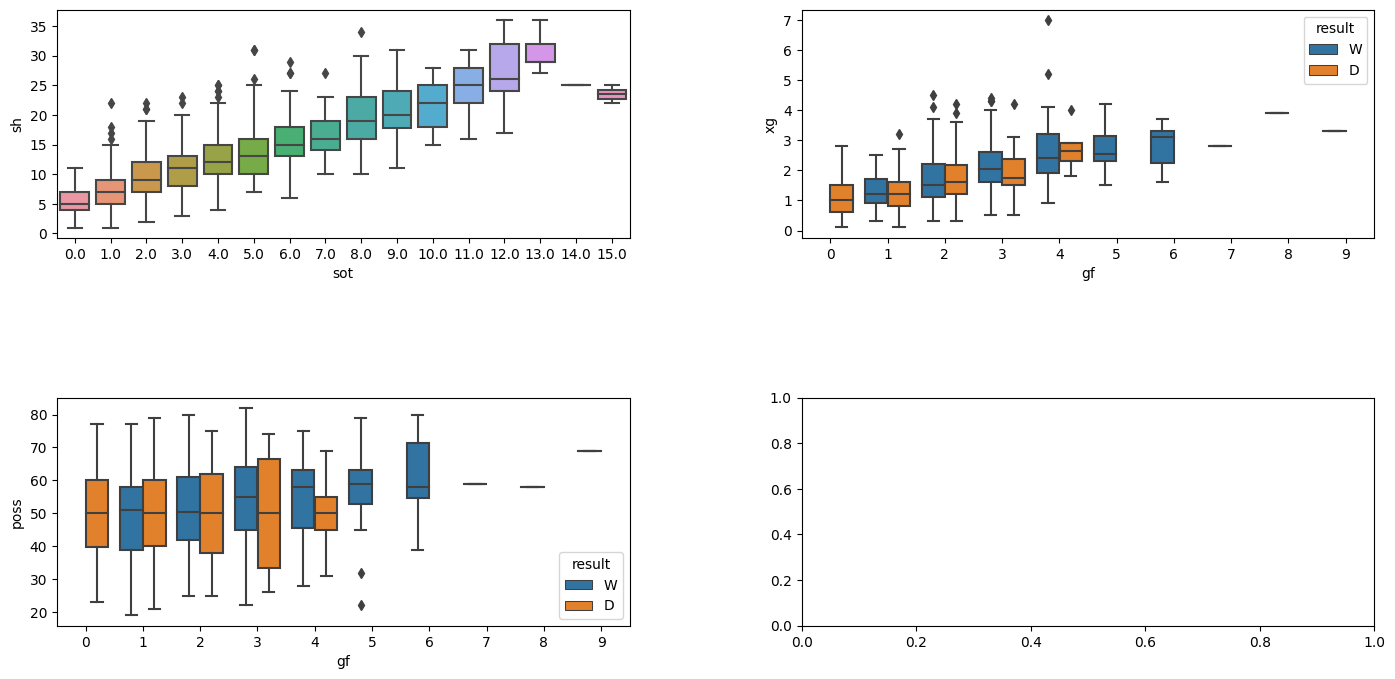

In [14]:
fig, ((ax0, ax1), (ax2, ax3))  = plt.subplots(nrows=2, ncols=2, figsize=(17,8))
fig.subplots_adjust(wspace=0.3, hspace=0.7)
sns.boxplot(data=df, x='sot', y='sh', ax=ax0)
# ax0.set_xticks(rotation=90)
sns.boxplot(data=df, y='xg', x='gf', hue='result', hue_order=['W', 'D'],ax=ax1)
sns.boxplot(data=df, y='poss', x='gf', hue='result', hue_order=['W', 'D'], ax=ax2);

In [15]:
df_teams = df[['gf', 'ga', 'xg', 'xga', 'poss','team']].groupby('team').mean()
df_teams.head()

,gf,ga,xg,xga,poss
team,,,,,
Arsenal,2.355263,0.947368,1.944737,0.921053,58.750000
Aston Villa,1.671053,1.407895,1.496053,1.480263,51.184211
Bournemouth,1.197368,1.815789,1.239474,1.601316,42.407895
Brentford,1.500000,1.460526,1.509211,1.382895,44.500000
Brighton and Hove Albion,1.671053,1.513158,1.709211,1.389474,60.039474


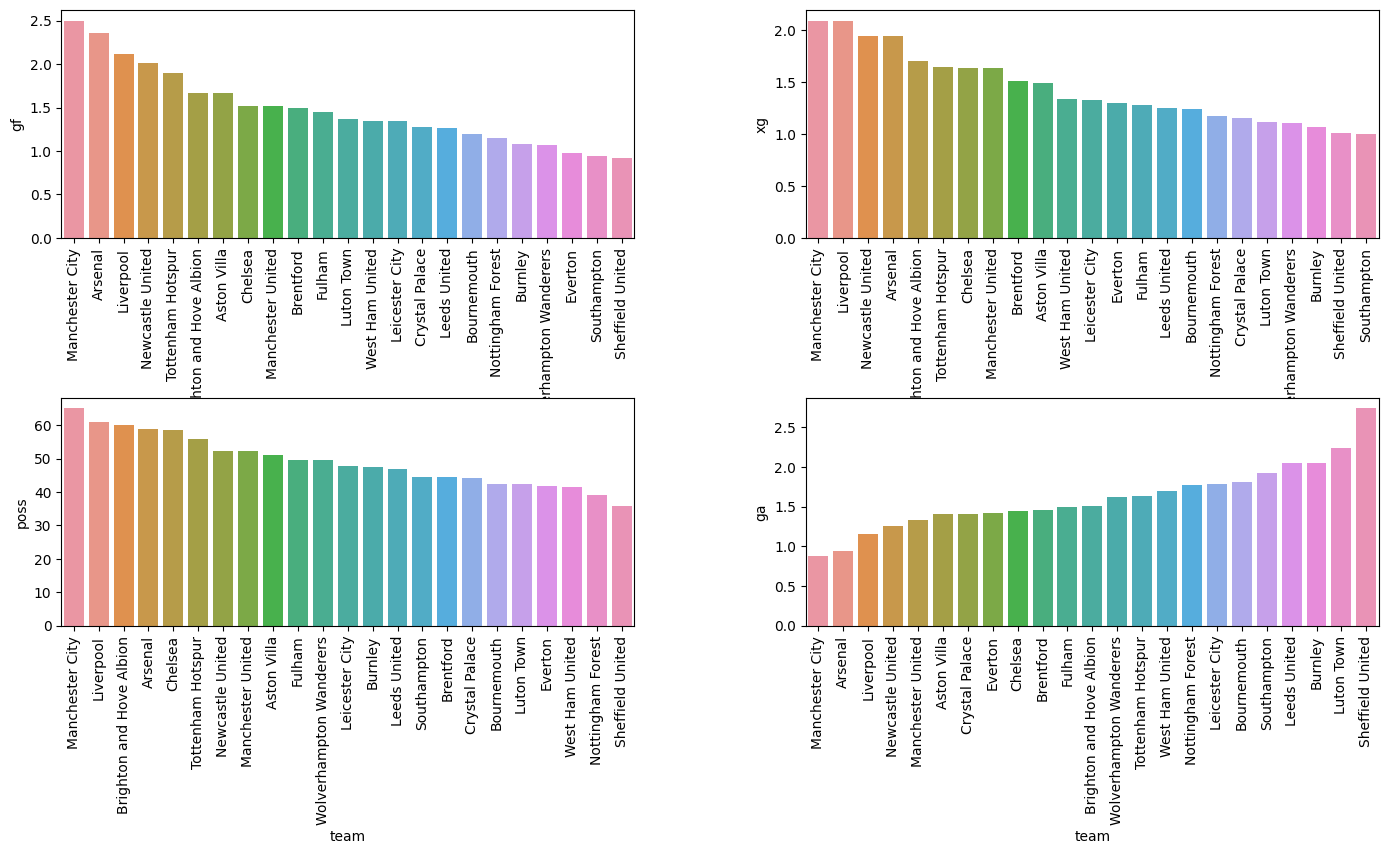

In [16]:
fig, ((ax0, ax1), (ax2, ax3))  = plt.subplots(nrows=2, ncols=2, figsize=(17,8))
fig.subplots_adjust(wspace=0.3, hspace=0.7)
sns.barplot(data=df_teams.sort_values(by='gf', ascending=False), x=df_teams.sort_values(by='gf', ascending=False).index, y='gf', ax=ax0)
ax0.set_xticklabels(ax0.get_xticklabels(),rotation=90)
sns.barplot(data=df_teams.sort_values(by='xg', ascending=False), x=df_teams.sort_values(by='xg', ascending=False).index, y='xg', ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
sns.barplot(data=df_teams.sort_values(by='poss', ascending=False), x=df_teams.sort_values(by='poss', ascending=False).index, y='poss', ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
sns.barplot(data=df_teams.sort_values(by='ga', ascending=True), x=df_teams.sort_values(by='ga', ascending=True).index, y='ga',  ax=ax3)
ax3.set_xticklabels(ax3.get_xticklabels(),rotation=90);

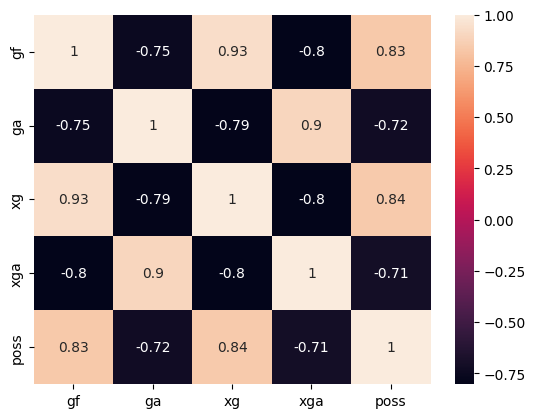

In [17]:
sns.heatmap(data=df_teams.corr(), annot=True);

## Data Preparation and Feature Engineering

In [18]:
df.head()

,date_time,comp,round,day,venue,result,gf,ga,opponent,xg,...,referee,match report,sh,sot,dist,fk,pk,pkatt,season,team
0,2023-08-11 20:00:00,Premier League,Matchweek 1,Fri,Away,W,3,0,Burnley,1.9,...,Craig Pawson,Match Report,17.0,8.0,13.9,0.0,0,0,2024,Manchester City
1,2023-08-19 20:00:00,Premier League,Matchweek 2,Sat,Home,W,1,0,Newcastle Utd,1.0,...,Robert Jones,Match Report,14.0,4.0,17.9,0.0,0,0,2024,Manchester City
2,2023-08-27 14:00:00,Premier League,Matchweek 3,Sun,Away,W,2,1,Sheffield Utd,3.5,...,Jarred Gillett,Match Report,29.0,9.0,17.3,2.0,0,1,2024,Manchester City
3,2023-09-02 15:00:00,Premier League,Matchweek 4,Sat,Home,W,5,1,Fulham,2.2,...,Michael Oliver,Match Report,6.0,4.0,14.8,0.0,1,1,2024,Manchester City
4,2023-09-16 15:00:00,Premier League,Matchweek 5,Sat,Away,W,3,1,West Ham,3.6,...,Andy Madley,Match Report,29.0,13.0,16.4,1.0,0,0,2024,Manchester City


In [19]:
df = df.drop(['attendance', 'match report', 'comp'], axis=1)

In [20]:
df['hour'] = df.date_time.dt.hour
df['month'] = df.date_time.dt.month
df['year'] = df.date_time.dt.year

In [21]:
X = pd.get_dummies(df.drop(['result', 'date_time'], axis=1), drop_first=True, dtype='int')
y = df['result']

## Model Selection and Training
### Choosing ML Model and Making Predictions

In [22]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier 
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [25]:
scaler = StandardScaler()
svc = LinearSVC(random_state=42)
rfc = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
ada = AdaBoostClassifier(random_state=42)

### Scaling our feature data

In [26]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_val = scaler.transform(X_val)
scaled_X_test = scaler.transform(X_test)

In [27]:
models = [svc, rfc, ada]
mod_score = {}
for model in models:
    model.fit(scaled_X_train, y_train)
    preds = model.predict(scaled_X_val)
    print(f"{model}:\n\n{classification_report(y_val, preds)}")
    mod_score[model] = accuracy_score(y_val, preds)


LinearSVC(random_state=42):

              precision    recall  f1-score   support

           D       0.97      0.68      0.80        44
           L       0.95      1.00      0.97        87
           W       0.91      0.99      0.95        97

    accuracy                           0.93       228
   macro avg       0.94      0.89      0.91       228
weighted avg       0.94      0.93      0.93       228

RandomForestClassifier(random_state=42):

              precision    recall  f1-score   support

           D       0.92      0.55      0.69        44
           L       0.90      0.99      0.94        87
           W       0.89      0.97      0.93        97

    accuracy                           0.89       228
   macro avg       0.90      0.83      0.85       228
weighted avg       0.90      0.89      0.88       228

AdaBoostClassifier(random_state=42):

              precision    recall  f1-score   support

           D       0.48      1.00      0.65        44
           L       1

In [28]:
mod_score

{LinearSVC(random_state=42): 0.9342105263157895,
 RandomForestClassifier(random_state=42): 0.8947368421052632,
 AdaBoostClassifier(random_state=42): 0.7894736842105263}

### Base LinearSVC model seems to perform the best out of the three. Let's explore the LinearSVC model hyperparameters using gridsearchCV to obtain the best optimized model

In [29]:
param_grid = {'penalty':['l1', 'l2'],
              'C': [0.001,0.01,0.1,0.5,1],
              'class_weight':['balanced', None],
              'random_state':[42]}

grid_model = GridSearchCV(svc, param_grid, verbose=0)

grid_model.fit(scaled_X_train, y_train)

GridSearchCV(estimator=LinearSVC(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'], 'random_state': [42]})

In [30]:
y_preds = grid_model.predict(scaled_X_val)

In [31]:
grid_model.best_score_

0.8759500398618123

In [32]:
print(classification_report(y_val, y_preds))

              precision    recall  f1-score   support

           D       0.97      0.68      0.80        44
           L       0.95      1.00      0.97        87
           W       0.91      0.99      0.95        97

    accuracy                           0.93       228
   macro avg       0.94      0.89      0.91       228
weighted avg       0.94      0.93      0.93       228



### Final score on Hold out test Dataset

In [33]:
final_preds = grid_model.predict(scaled_X_test)

In [34]:
print(classification_report(y_test, final_preds))

              precision    recall  f1-score   support

           D       0.92      0.72      0.81        50
           L       0.98      0.98      0.98        85
           W       0.88      0.99      0.93        93

    accuracy                           0.93       228
   macro avg       0.93      0.90      0.91       228
weighted avg       0.93      0.93      0.92       228



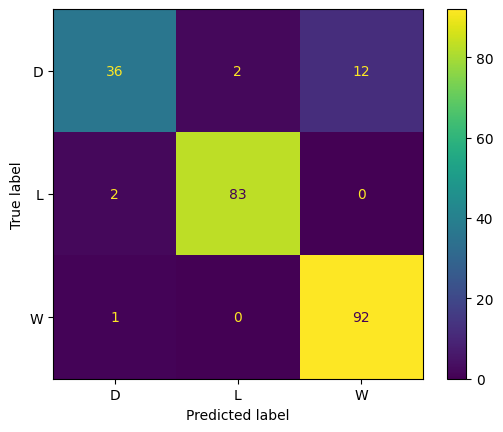

In [35]:
ConfusionMatrixDisplay.from_predictions(y_test, final_preds);

## Saving the Model

In [61]:
from joblib import dump

In [62]:
dump(grid_model, 'final_model.pkl')

['final_model.pkl']